In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,export_graphviz
import graphviz
import dtreeviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import tree
import pandas as pd
import numpy as np
import pickle
import os
from pypinyin import pinyin

In [2]:
def convert(words):
    py = pinyin(words)
    res = ""
    for i in py:
       res+=i[0][0].upper()
    return res

In [3]:
# zst
dataset = pd.read_csv('../../../data/csv_file/feature_table_result.csv')
dataset.dropna(inplace=True)
zst_data = pd.DataFrame(dataset[dataset['土类'] == "紫色土"])
zst_data["SC2_label"] = zst_data.SC2.astype("category").cat.codes
zst_data["DL_label"] = zst_data.DL.astype("category").cat.codes
zst_data["DZ_label"] = zst_data.DZ.astype("category").cat.codes
zst_data["TL_label"] = zst_data.土类.astype("category").cat.codes
zst_data["YL_label"] = zst_data.亚类.astype("category").cat.codes
zst_data["TS_label"] = zst_data.土属.astype("category").cat.codes
zst_data["TZ_label"] = zst_data.土种.astype("category").cat.codes
zst_target = 'TZ_label'
features = ['DEM', 'TWI5', 'TPI201', 'TMP','SLOP', 'PRE', 'NIGTH', 'NDVI','PH', 'SOM', 'SC2_label', 'DL_label', 'DZ_label']
zstX = zst_data[features]
zsty = zst_data[zst_target]
zstX_train, zstX_test, zsty_train, zsty_test = train_test_split(zstX, zsty, test_size=0.2, random_state=52)

In [4]:
zst_result = zst_data.groupby('TZ_label')["土种"].apply(lambda x: list(x.unique())).to_dict()

In [5]:
# 通过网格搜索找到最优超参数
zst_params = {'criterion':['gini','entropy'], 'max_depth':list(range(2,100))} 
zst_grid_tree = GridSearchCV(DecisionTreeClassifier(), zst_params, cv=5)
zst_grid_tree.fit(zstX_train, zsty_train)
print(zst_grid_tree.best_params_)

/home/runker/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.


{'criterion': 'entropy', 'max_depth': 4}


In [6]:

zst_tree_classifier = DecisionTreeClassifier(random_state=42,**zst_grid_tree.best_params_)
zst_tree_classifier.fit(zstX_train, zsty_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [7]:
# 查看准确率
zst_y_test_pred= zst_tree_classifier.predict(zstX_test)
zst_y_train_pred = zst_tree_classifier.predict(zstX_train)
accuracy_test = accuracy_score(zsty_test,zst_y_test_pred)
accuracy_train = accuracy_score(zsty_train,zst_y_train_pred)
print(accuracy_train,accuracy_test)

0.48830409356725146 0.32558139534883723


In [8]:
# 画图
zst_model = dtreeviz.model(zst_tree_classifier,
                           X_train=zstX_train, y_train=zsty_train,
                           feature_names=features,
                           target_name=zst_target, class_names=[convert(zst_result[_][0]) for _ in zst_result])

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

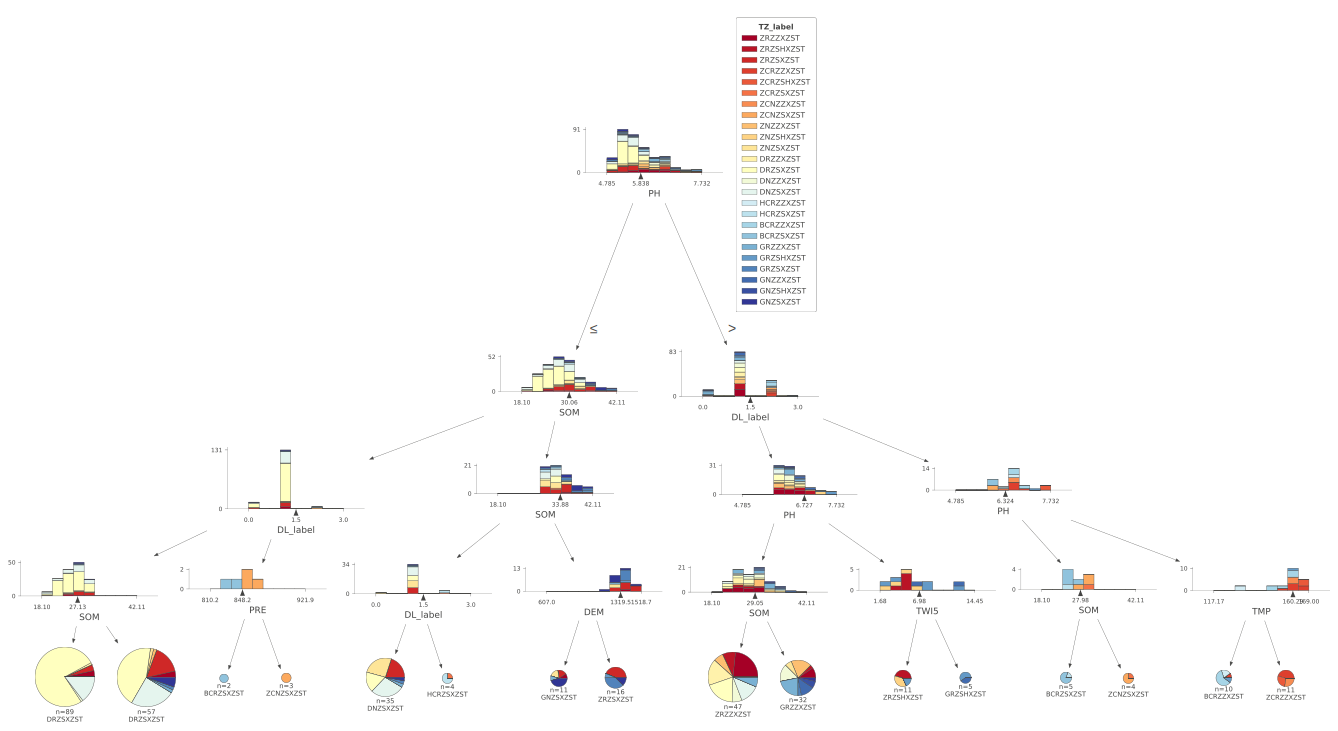

In [9]:
zst_model.view()

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

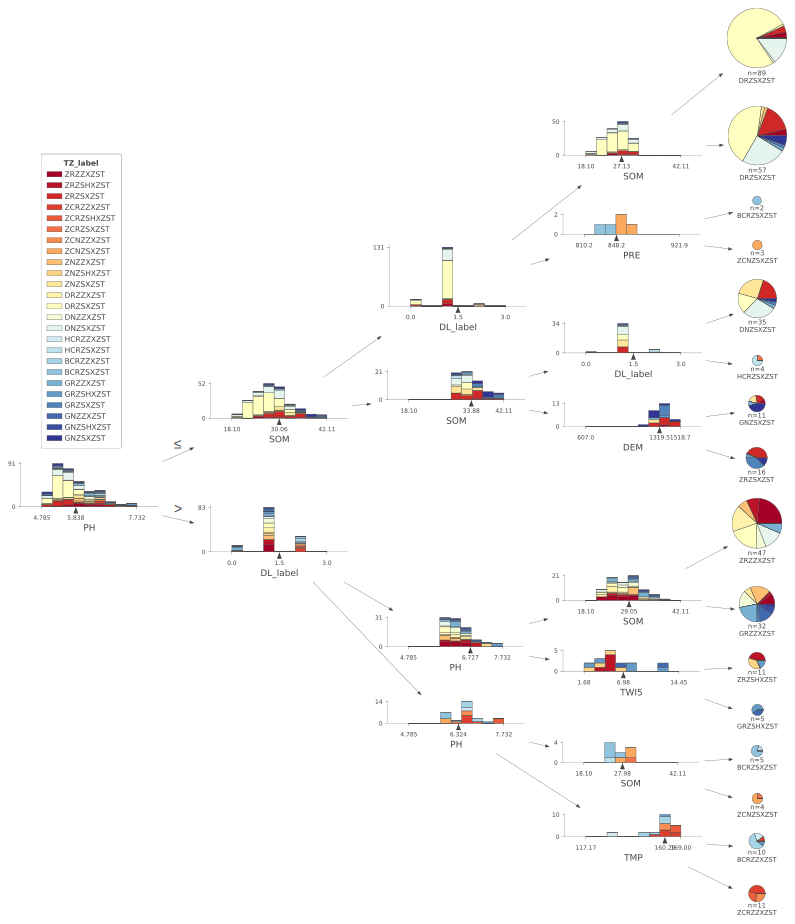

In [10]:
zst_model.view(orientation="LR")

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

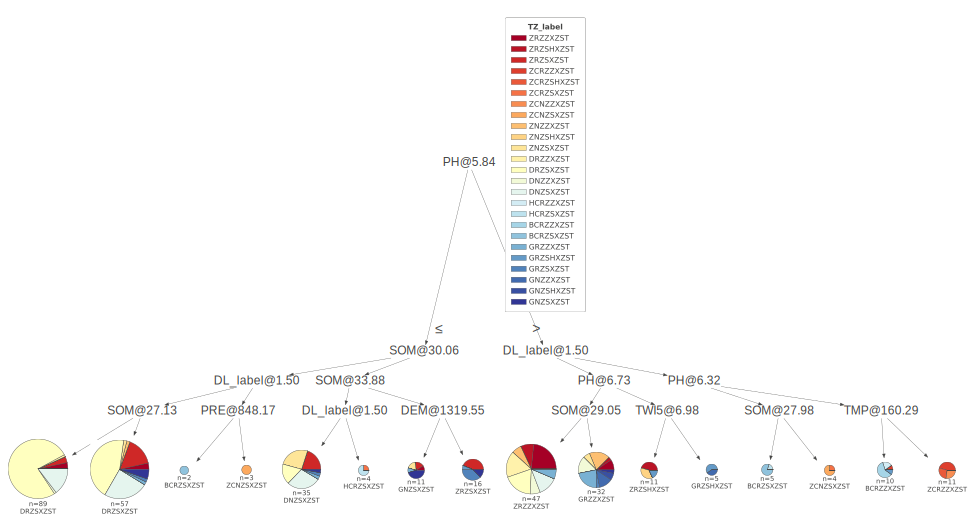

In [11]:
zst_model.view(fancy=False)